In [2]:

%load_ext autoreload
%autoreload 2

from nnfabrik.builder import get_model, get_trainer, get_data
import torch
import matplotlib.pyplot as plt

import numpy as np


In [3]:

trainer_fn, trainer_config = ('nnvision.training.trainers.nnvision_trainer',
 {'stop_function': 'get_poisson_loss',
  'maximize': False,
  'avg_loss': False,
  'device': 'cuda',
  'max_iter': 200,
  'lr_init': 0.005,
  'lr_decay_steps': 5,
  'patience': 3,
  'verbose': True,
  'adamw': True})


In [4]:
trainer = get_trainer(trainer_fn, trainer_config)

In [5]:
dataset_fn, dataset_config = ('nnvision.datasets.monkey_loaders.monkey_static_loader_combined',
 {'dataset': 'CSRF19_V4',
  'neuronal_data_files': [
   #'neuronal_data/CSRF19_V4_3748441462696.pickle',
   'neuronal_data/CSRF19_V4_3744900291863.pickle'
   #'/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3647617982355.pickle',
],
  'image_cache_path': 'images/',
  'crop': [[18, 18], [110, 110]],
  'subsample': 1,
  'scale': 0.5,
  'seed': 1000,
  'time_bins_sum': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
  'batch_size': 64,
  'include_prev_image': False,
  'include_trial_id': False,
  'img_mean': 124.34,
  'img_std': 70.28,
   })

In [7]:
dataloaders = get_data(dataset_fn, dataset_config)

Files Processing:   0%|          | 0/1 [00:00<?, ?it/s]

Files Processing: 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]
/usr/local/lib/python3.8/dist-packages/skimage/_shared/utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


In [35]:
batch = next(iter(dataloaders["train"]["all_sessions"]))

/usr/local/lib/python3.8/dist-packages/skimage/_shared/utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


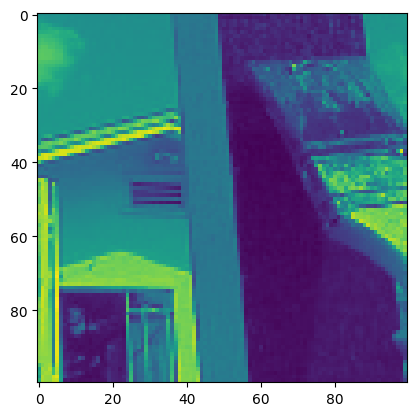

In [39]:
plt.imshow(batch.inputs[6][0])

In [11]:
responses = dataloaders['train']['all_sessions'].dataset.tensors
torch.save(responses,"DatasetResponses_3744900291863.pt")

In [13]:
stim = dataloaders['train']['all_sessions'].dataset.image_cache.cache
torch.save(stim, "DatasetImages_3744900291863.pt")